## Анализ 3P за период с 1.12 по 31.1

- Я выгрузил из Jira данные, занес их в тетрадь и дальше построил график, который отражает кол-во поставок 3Р в зависимости от метода транспортировки

In [96]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [97]:
data = pd.DataFrame({
    'WMS order number': [34845, 34534, 32711, 35182, 32855, 32705, 34536, 31689, 32459, 33980, 34843, 34837, 36222, 32708, 33683, 33533, 33532, 32460, 32461, 33253, 34840, 34364, 33981, 34518, 33984, 33527, 35183, 32854, 32455, 34838, 33257, 31690, 33258, 33530, 33983, 28874, 34535, 31231, 38947, 39191, 38353, 34835, 35900, 34834, 38355, 38675, 38941, 41166, 37851, 38021, 38671, 39189, 41498, 37095, 38354, 38935, 38681, 39144, 38673, 38672, 38940, 41164, 36576, 41499, 41501, 41200, 38939, 38350, 41762, 42244, 41201, 42193, 42318, 37344, 37094, 37096, 31857, 34533, 33982, 34226, 37853, 33684, 36223, 34842, 31490, 36570, 32698, 32707, 36802, 33535, 31489, 32058, 34839, 37394, 37391, 37396, 34836, 37093, 38351, 34227, 35865, 32710, 31846, 34844, 31410, 30947, 31848, 31486, 29755, 32709, 31569, 31847, 33528, 36221, 32856, 31229, 30940, 38352, 38357, 32824, 32676, 41948, 42550, 41495, 38348, 42195, 41162, 37092, 37462, 38564, 40991, 41065, 41066, 41165, 41409, 41767, 41942, 38349, 36804, 39192, 42980, 42979, 43497, 43522, 37599, 37393, 37271, 41067, 41163, 41693, 41600, 38347, 43167, 37852, 37272, 37458, 37604, 41064, 41001, 41408, 41402, 41599, 41198, 38128, 38356, 43319, 43341, 43518, 42870, 43320, 42658, 42656, 38127, 41502, 39524, 42655, 42657, 43172, 43174, 41202, 42654, 42650, 38563, 42559, 42669, 42327, 31856, 41703, 41510, 41761, 31492, 31680, 42054, 41697, 41701, 41946, 41760, 42659, 42552, 42194, 42871, 42326, 37606, 41702, 41271, 41768, 41947, 43311, 43169, 42978, 42245, 43168, 43170, 41951, 43146, 43166, 41704],
    'Transportation method': ['air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'land', 'air', 'air', 'air', 'air', 'air', 'land', 'land', 'land', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'land', 'air', 'land', 'air', 'air', 'air', 'air', 'land', 'air', 'air', 'land', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'land', 'air', 'air', 'air', 'air', 'air', 'land', 'air', 'air', 'land', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'air', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'air', 'air', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'air', 'land', 'land', 'land', 'land', 'land', 'air', 'air', 'air', 'land', 'air', 'air', 'air', 'air', 'air', 'air', 'land', 'land', 'land', 'air', 'air', 'land', 'air', 'land', 'land', 'land', 'air', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land', 'land'
],
    'Excel serial numbers': [
       45273, 45274, 45275, 45276, 45278, 45268, 45278, 45268, 45268, 45269, 45273, 45273, 45277, 45275, 45277, 45277, 45277, 45278, 45268, 45268, 45273, 45275, 45275, 45276, 45277, 45278, 45276, 45278, 45268, 45273, 45277, 45268, 45268, 45269, 45272, 45275, 45275, 45262, 45296, 45296, 45296, 45278, 45278, 45278, 45302, 45296, 45291, 45302, 45288, 45296, 45296, 45302, 45304, 45292, 45296, 45288, 45302, 45302, 45296, 45296, 45302, 45297, 45296, 45304, 45304, 45304, 45296, 45296, 45310, 45314, 45314, 45314, 45311, 45283, 45283, 45281, 45277, 45275, 45281, 45271, 45287, 45271, 45284, 45273, 45275, 45284, 45264, 45281, 45284, 45268, 45267, 45274, 45287, 45284, 45287, 45284, 45287, 45283, 45290, 45272, 45279, 45268, 45267, 45284, 45267, 45262, 45265, 45262, 45275, 45268, 45270, 45271, 45282, 45286, 45266, 45267, 45267, 45290, 45290, 45269, 45264, 45317, 45316, 45310, 45290, 45316, 45310, 45284, 45284, 45296, 45299, 45303, 45303, 45300, 45306, 45310, 45309, 45289, 45291, 45302, 45321, 45321, 45321, 45321, 45286, 45284, 45296, 45300, 45299, 45306, 45306, 45289, 45321, 45288, 45284, 45284, 45284, 45299, 45300, 45306, 45303, 45307, 45309, 45289, 45296, 45321, 45321, 45321, 45321, 45318, 45319, 45319, 45296, 45314, 45296, 45319, 45319, 45321, 45319, 45319, 45320, 45320, 45300, 45319, 45322, 45316, 45264, 45313, 45313, 45313, 45262, 45261, 45313, 45313, 45313, 45313, 45313, 45316, 45313, 45316, 45316, 45316, 45295, 45313, 45313, 45313, 45313, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45313
    ]
})
excel_start_date = datetime.datetime(1899, 12, 30)

data['Date'] = excel_start_date + pd.to_timedelta(data['Excel serial numbers'], unit='D')

data['Formatted Date'] = data['Date'].dt.strftime('%d.%m.%Y %H:%M')

data['Week Number'] = data['Date'].dt.isocalendar().week
data['Year'] = data['Date'].dt.year

min_date = data['Date'].min()
max_date = data['Date'].max()

print("Минимальная дата:", min_date)
print("Максимальная дата:", max_date)


Минимальная дата: 2023-12-01 00:00:00
Максимальная дата: 2024-01-31 00:00:00


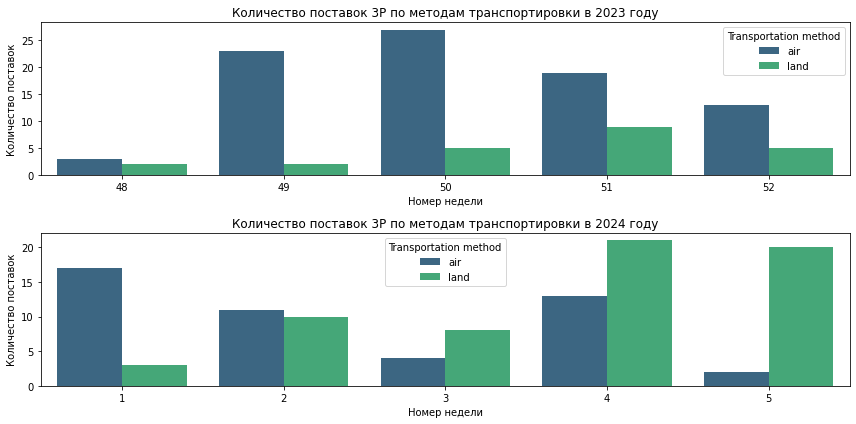

In [113]:
data_2023 = data[data['Year'] == 2023]
data_2024 = data[data['Year'] == 2024]

transport_counts_2023 = data_2023.groupby(['Week Number', 'Transportation method']).size().reset_index(name='Counts')

transport_counts_2024 = data_2024.groupby(['Week Number', 'Transportation method']).size().reset_index(name='Counts')

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1) 
sns.barplot(x='Week Number', y='Counts', hue='Transportation method', data=transport_counts_2023, palette='viridis')
plt.title('Количество поставок 3P по методам транспортировки в 2023 году')
plt.xlabel('Номер недели')
plt.ylabel('Количество поставок')
plt.xticks()

plt.subplot(2, 1, 2) 
sns.barplot(x='Week Number', y='Counts', hue='Transportation method', data=transport_counts_2024, palette='viridis')
plt.title('Количество поставок 3P по методам транспортировки в 2024 году')
plt.xlabel('Номер недели')
plt.ylabel('Количество поставок')
plt.xticks()

plt.tight_layout()  
plt.show()


## Интерактивный вариант этого же графика

In [112]:
fig_2023 = px.bar(transport_counts_2023, 
                   x='Week Number', 
                   y='Counts', 
                   color='Transportation method', 
                   barmode='group',
                   title='Количество поставок 3P по методам транспортировки в 2023 году',
                   labels={'Week Number': 'Номер недели', 'Counts': 'Количество поставок'},
                   category_orders={'Week Number': sorted(transport_counts_2023['Week Number'].unique())},
                   hover_data={'Week Number': False, 'Transportation method': True, 'Counts': True}
                  )
fig_2023.update_layout(xaxis=dict(),
                        legend_title='Метод транспортировки')

fig_2024 = px.bar(transport_counts_2024, 
                   x='Week Number', 
                   y='Counts', 
                   color='Transportation method', 
                   barmode='group',
                   title='Количество поставок 3P по методам транспортировки в 2024 году',
                   labels={'Week Number': 'Номер недели', 'Counts': 'Количество поставок'},
                   category_orders={'Week Number': sorted(transport_counts_2024['Week Number'].unique())},
                   hover_data={'Week Number': False, 'Transportation method': True, 'Counts': True}
                  )
fig_2024.update_layout(xaxis=dict(),
                        legend_title='Метод транспортировки')

fig_2023.show()
fig_2024.show()

- Здесь можно навести курсор и отдельным комментарием будет выводиться подробная информация

## Анализ статусов 1Р за период с 24.1 по 31.1
- Выгрузил данные за этот период из Жиры, т.к. траки за этот период относительно недавно прибыли на склад и по кол-ву строк этот период наиболее подходящий (997 строк смог выгрузить из Жиры)

In [100]:
data2 = pd.DataFrame({
    'WMS order number 2': [
        '41339', '41343', '41754', '41884', '41778', '41661', '41662', '41629', '41670', '41613', '41606', '41622', '41779', '41784', '41755', '41785', '41733', '41605', '41627', '41682', '41845', '41716', '41713', '41660', '41788', '41678', '41666', '41776', '41685', '41676', '41659', '41792', '41734', '41798', '41712', '41801', '41881', '41728', '41911', '41878', '41906', '41886', '41908', '41839', '41834', '41850', '41866', '41608', '41854', '41861', '41741', '41780', '41935', '41900', '41375', '41395', '41915', '41639', '41705', '41889', '41926', '41714', '41349', '41353', '41332', '41740', '41879', '41873', '41399', '41838', '41341', '41351', '41337', '41927', '41657', '41658', '41397', '38589', '38835', '41372', '41732', '41653', '41672', '41365', '41830', '41336', '41379', '41366', '41632', '41934', '41920', '41388', '41916', '41612', '41634', '41753', '41348', '41383', '41358', '41913', '41381', '41342', '41321', '41392', '41371', '41286', '41338', '41396', '41387', '41725', '41742', '41750', '41360', '41931', '41856', '41378', '41384', '41385', '41374', '41369', '41377', '41910', '41877', '41852', '41344', '41669', '41356', '41362', '41793', '41883', '41334', '41331', '41394', '41386', '41333', '41860', '41800', '41709', '41721', '41745', '41644', '41804', '41648', '41400', '41630', '41646', '41643', '41359', '41723', '41367', '41914', '41651', '41729', '41932', '41789', '41637', '41848', '41832', '41735', '41831', '41720', '41677', '41364', '42130', '42097', '42147', '41352', '41748', '41710', '41817', '41783', '42124', '41802', '42164', '41846', '41715', '41876', '41681', '41680', '42190', '42178', '41803', '42258', '42104', '42117', '42315', '41726', '42060', '42059', '42275', '42151', '42264', '42123', '42160', '42177', '42132', '42180', '42080', '41711', '41917', '41615', '41777', '42110', '42128', '41687', '41617', '42290', '42159', '41909', '42135', '42314', '41907', '42063', '41810', '41820', '41724', '41828', '41829', '41794', '41869', '41835', '41921', '41718', '41616', '41628', '41398', '41663', '41739', '41882', '41859', '41737', '41620', '41654', '41638', '41376', '41668', '41380', '41923', '41893', '41766', '41645', '41905', '41647', '41894', '41867', '41727', '41833', '41746', '41782', '41864', '41880', '41924', '41373', '41849', '41858', '41624', '41621', '42308', '41679', '41863', '41355', '41925', '41937', '41919', '41391', '41361', '41797', '41345', '41665', '41335', '41363', '41744', '41749', '41730', '41674', '41393', '41781', '41717', '41683', '41896', '41390', '41857', '41899', '41912', '41671', '41840', '41851', '41841', '41635', '41895', '42188', '41844', '41611', '41870', '41350', '41649', '42265', '41865', '41887', '41618', '41626', '41650', '41875', '41642', '41604', '41936', '41796', '41837', '41736', '41652', '41625', '41340', '41664', '41843', '41357', '41786', '41904', '41675', '41631', '41903', '41747', '41633', '41656', '41787', '41799', '41354', '41933', '41370', '42156', '38908', '42306', '41821', '41901', '41890', '41928', '41855', '41885', '41888', '41892', '42298', '42064', '41382', '41847', '41738', '41673', '41346', '41607', '41902', '41874', '38916', '42109', '42065', '42136', '42268', '41811', '42093', '41818', '42090', '42228', '42223', '42111', '42225', '42040', '41655', '41603', '41722', '41610', '41743', '41930', '41706', '42313', '42274', '42108', '42106', '42113', '42076', '42143', '42176', '41790', '41814', '41609', '41922', '41602', '42057', '41707', '42237', '41614', '41968', '41823', '42103', '42289', '42303', '42066', '41636', '42145', '42084', '41868', '41667', '42017', '42255', '42215', '41601', '42283', '42021', '41640', '41929', '41541', '42206', '41641', '42295', '42019', '41853', '41688', '41822', '42042', '42238', '42028', '41969', '42036', '42200', '42182', '41997', '42224', '42007', '41967', '42055', '42078', '42257', '41619', '42184', '42069', '42279', '42267', '42146', '42058', '42254', '42175', '42307', '41871', '41824', '42157', '41816', '42068', '41965', '41974', '42077', '42067', '41807', '42126', '42214', '38852', '41389', '42010', '42035', '42005', '38884', '38927', '38872', '38804', '38778', '38918', '38789', '41806', '38777', '38802', '38813', '42105', '42142', '38825', '38892', '38880', '38833', '38928', '38903', '38877', '38857', '41944', '42083', '41987', '42161', '42201', '42008', '42045', '42000', '42001', '42013', '42043', '42012', '42079', '41961', '42075', '42300', '42158', '42140', '42251', '41998', '42086', '41719', '42168', '41977', '42150', '41769', '42082', '42165', '42061', '42133', '42089', '42252', '42266', '42098', '42291', '41978', '42312', '42260', '42162', '42181', '42071', '42011', '42211', '41984', '42192', '42286', '42179', '42169', '42081', '42210', '42232', '41795', '41891', '42152', '42302', '42217', '42311', '41988', '42231', '41994', '41959', '42309', '41976', '42015', '41995', '41975', '42003', '42246', '41972', '42027', '42101', '42100', '42292', '42208', '42074', '41964', '42029', '42304', '42037', '42227', '42174', '42284', '41809', '42137', '42062', '42031', '42056', '42220', '42259', '42294', '42271', '41973', '42310', '42189', '42301', '41958', '42122', '41979', '42006', '41980', '42099', '42248', '42171', '42153', '42191', '41815', '42044', '42032', '42185', '42138', '42134', '42118', '42038', '42119', '41686', '42018', '41971', '42154', '41898', '42030', '42293', '42041', '42149', '41983', '41819', '42115', '41813', '41960', '42004', '42261', '42088', '42120', '42016', '42166', '41897', '42183', '41992', '42272', '42022', '42095', '42256', '42282', '38801', '40394', '38912', '38815', '40545', '39109', '38911', '38786', '38890', '38870', '38866', '42167', '38845', '38807', '38841', '38762', '42087', '42155', '38781', '38886', '38899', '38817', '38769', '38896', '38772', '38876', '38792', '42148', '38853', '38771', '38909', '38808', '38805', '38842', '38779', '38810', '38799', '38846', '38920', '38901', '38795', '38827', '38838', '38861', '38902', '38900', '38831', '38881', '38818', '38796', '38925', '38851', '38847', '38794', '38775', '38783', '38834', '38832', '38894', '38767', '42250', '38844', '38839', '38850', '41872', '38788', '38790', '38933', '38803', '42094', '42186', '42096', '38811', '38917', '42262', '42163', '41945', '41623', '41862', '42247', '42172', '42277', '42107', '42121', '41986', '42287', '42270', '42187', '42131', '42273', '42173', '42285', '41812', '42297', '42280', '42073', '42127', '42112', '42278', '42269', '42072', '42092', '42102', '42091', '42141', '42170', '42281', '41731', '41989', '42222', '41836', '42116', '42129', '41943', '42024', '42139', '42114', '42276', '42070', '42299', '41684', '42033', '41966', '41981', '42014', '42085', '42039', '41808', '38774', '38882', '38824', '38725', '38595', '38758', '38701', '38703', '42202', '38708', '38731', '41842', '38579', '38711', '42240', '42125', '42020', '41991', '42144', '38709', '38715', '42002', '41982', '38879', '38705', '42226', '38630', '42230', '41962', '42205', '38752', '38706', '38722', '38742', '38747', '42253', '41993', '42209', '41985', '38727', '42305', '42034', '38654', '38922', '38759', '38569', '38793', '38741', '38730', '38714', '38694', '38608', '38704', '38721', '38733', '42207', '38760', '38645', '42026', '38707', '38745', '38719', '38574', '38874', '42263', '42009', '42218', '41708', '38565', '38739', '41990', '42203', '42213', '41999', '38613', '38729', '38932', '41918', '38720', '38910', '38780', '38717', '38840', '38735', '38828', '38898', '38738', '38723', '38753', '41957', '42219', '38929', '38885', '38770', '38919', '38931', '38664', '42296', '41963', '38871', '42221', '38875', '38893', '42216', '41791', '42229', '38791', '38924', '38926', '38812', '38856', '38806', '38669', '38712', '38728', '38637', '41368', '42204', '38724', '38867', '38785', '38934', '38782', '42025', '38865', '38746', '38638', '38641', '38652', '38615', '38702', '42288', '42212', '38757', '38930', '39068', '38734', '38571', '38666', '38921', '38667', '38600', '38873', '38581', '38862', '38868', '38913', '38750', '39038', '38887', '38764', '38653', '38843', '38953', '42249', '38755', '38797', '38820', '38635', '38784', '38906', '38773', '39142', '38897', '38754', '38766', '38713', '38888', '38905', '38823', '38849', '38768', '38616', '39022', '38740', '38765', '38816', '38836', '38904', '38889', '38612', '38656', '38830', '38878', '38800', '38854', '38814', '38864', '38855', '38749', '38798', '38594', '38718', '38895', '38736', '38743', '38829', '38632', '38663', '38821', '38883', '38618', '38761', '38756', '38787', '38826', '38578', '38592', '38710', '38716', '38726', '38737', '38891', '38860', '38923', '38837', '38848', '38776', '38668', '41996', '38915', '38744', '38819', '40546', '39032', '38869', '38751', '42023', '38604', '39143', '42236', '38809', '38643', '39063', '42233', '38591', '38700', '38822', '38907', '38763', '38859', '38914', '38863', '41825', '41970', '42235', '38858', '42234', '38732', '38748'
    ],
    'Status': [
        'Cargo arrived at BWH', 'Cargo arrived at BWH', 'Cargo arrived at BWH', 'Cargo arrived at BWH', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'Customs declaration', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'Cargo arrived at BWH', 'Cargo arrived at BWH', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'Customs declaration', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'Cargo arrived at BWH', 'Cargo arrived at BWH', 'Cargo arrived at BWH', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'Cargo arrived at BWH', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'Cargo arrived at BWH', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'Cargo arrived at BWH', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'Cargo arrived at BWH', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'Cargo arrived at BWH', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'Customs declaration', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'Customs declaration', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf', 'On shelf'
    ],
    'Arrival date': [
      45315, 45315, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45315, 45315, 45316, 45316, 45316, 45316, 45316, 45316, 45315, 45315, 45315, 45316, 45316, 45316, 45315, 45316, 45315, 45315, 45315, 45316, 45316, 45316, 45315, 45322, 45322, 45315, 45316, 45316, 45316, 45315, 45316, 45315, 45315, 45315, 45316, 45316, 45316, 45315, 45316, 45316, 45316, 45316, 45315, 45315, 45315, 45316, 45315, 45315, 45315, 45315, 45315, 45315, 45315, 45315, 45315, 45316, 45316, 45316, 45315, 45316, 45316, 45315, 45315, 45315, 45315, 45315, 45315, 45316, 45316, 45316, 45315, 45316, 45315, 45315, 45316, 45316, 45315, 45315, 45315, 45315, 45315, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45315, 45316, 45316, 45316, 45315, 45316, 45315, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45315, 45320, 45320, 45320, 45315, 45316, 45316, 45320, 45316, 45320, 45316, 45320, 45316, 45316, 45316, 45316, 45316, 45320, 45320, 45316, 45320, 45320, 45320, 45320, 45316, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45316, 45316, 45316, 45316, 45320, 45320, 45316, 45316, 45320, 45320, 45316, 45320, 45320, 45316, 45320, 45320, 45320, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45315, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45315, 45316, 45315, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45315, 45316, 45316, 45316, 45316, 45320, 45316, 45316, 45315, 45316, 45316, 45316, 45315, 45315, 45316, 45315, 45316, 45315, 45315, 45316, 45316, 45316, 45316, 45315, 45316, 45316, 45316, 45316, 45315, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45320, 45316, 45316, 45316, 45315, 45316, 45320, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45315, 45316, 45316, 45315, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45315, 45316, 45315, 45320, 45322, 45320, 45320, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45320, 45320, 45315, 45316, 45316, 45316, 45315, 45316, 45316, 45316, 45322, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45316, 45316, 45316, 45316, 45316, 45316, 45316, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45316, 45320, 45316, 45316, 45316, 45320, 45316, 45320, 45316, 45320, 45320, 45320, 45320, 45320, 45320, 45316, 45320, 45320, 45316, 45316, 45320, 45320, 45320, 45316, 45320, 45320, 45316, 45316, 45316, 45320, 45316, 45320, 45320, 45316, 45316, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45316, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45316, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45322, 45315, 45320, 45320, 45320, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45320, 45322, 45322, 45322, 45320, 45320, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45316, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45316, 45316, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45316, 45320, 45320, 45320, 45316, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45316, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45320, 45322, 45322, 45322, 45322, 45320, 45320, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45320, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45320, 45322, 45322, 45322, 45316, 45322, 45322, 45322, 45322, 45320, 45320, 45320, 45322, 45322, 45320, 45320, 45320, 45316, 45316, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45316, 45320, 45320, 45316, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45316, 45320, 45320, 45320, 45320, 45320, 45320, 45320, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45320, 45322, 45322, 45316, 45322, 45322, 45320, 45320, 45320, 45320, 45320, 45322, 45322, 45320, 45320, 45322, 45322, 45320, 45322, 45320, 45320, 45320, 45322, 45322, 45322, 45322, 45322, 45320, 45320, 45320, 45320, 45322, 45320, 45320, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45320, 45322, 45322, 45320, 45322, 45322, 45322, 45322, 45322, 45320, 45320, 45320, 45316, 45322, 45322, 45320, 45320, 45320, 45320, 45322, 45322, 45322, 45316, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45320, 45320, 45322, 45322, 45322, 45322, 45322, 45322, 45320, 45320, 45322, 45320, 45322, 45322, 45320, 45316, 45320, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45315, 45320, 45322, 45322, 45322, 45322, 45322, 45320, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45320, 45320, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45320, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45320, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45320, 45322, 45322, 45320, 45322, 45322, 45322, 45320, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45322, 45320, 45320, 45320, 45322, 45320, 45322, 45322 
    ],
    'Truck number':
    [
        '45', '45', '48', '48', '47', '47', '47', '47', '47', '47', '47', '47', '47', '47', '47', '47', '47', '47', '47', '47', '48', '47', '47', '47', '47', '47', '47', '47', '47', '47', '47', '47', '47', '47', '47', '48', '48', '48', '48', '48', '48', '48', '48', '48', '48', '48', '48', '47', '48', '48', '47', '47', '48', '48', '45', '45', '48', '47', '47', '48', '48', '47', '45', '45', '45', '47', '48', '48', '45', '48', '45', '45', '45', '48', '47', '47', '45', '37', '37', '45', '47', '47', '47', '45', '48', '45', '45', '45', '47', '48', '48', '45', '48', '47', '47', '47', '45', '45', '45', '48', '45', '45', '45', '45', '45', '45', '45', '45', '45', '47', '47', '47', '45', '48', '48', '45', '45', '45', '45', '45', '45', '48', '48', '48', '45', '47', '45', '45', '48', '48', '45', '45', '45', '45', '45', '48', '47', '47', '47', '47', '47', '47', '47', '45', '47', '47', '47', '45', '47', '45', '48', '47', '47', '48', '47', '47', '48', '48', '47', '48', '47', '47', '45', '49', '49', '49', '45', '47', '47', '49', '47', '49', '47', '49', '48', '47', '48', '47', '47', '49', '49', '47', '49', '49', '49', '49', '47', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '47', '48', '47', '47', '49', '49', '47', '47', '49', '49', '48', '49', '49', '48', '49', '49', '49', '47', '47', '48', '47', '48', '48', '48', '47', '47', '47', '45', '47', '47', '48', '48', '47', '47', '47', '47', '45', '47', '45', '48', '48', '48', '47', '48', '47', '48', '48', '47', '48', '47', '48', '48', '48', '48', '45', '48', '48', '47', '47', '49', '47', '48', '45', '48', '48', '48', '45', '45', '47', '45', '47', '45', '45', '47', '47', '47', '47', '45', '47', '47', '47', '48', '45', '48', '48', '48', '47', '48', '48', '48', '47', '48', '49', '48', '47', '48', '45', '47', '49', '48', '48', '47', '47', '47', '48', '47', '47', '48', '47', '48', '47', '47', '47', '45', '47', '48', '45', '47', '48', '47', '47', '48', '47', '47', '47', '47', '47', '45', '48', '45', '49', '37', '49', '49', '48', '48', '48', '48', '48', '48', '48', '49', '49', '45', '48', '47', '47', '45', '47', '48', '48', '37', '49', '49', '49', '49', '49', '49', '49', '49', '50', '50', '49', '50', '50', '47', '47', '47', '47', '47', '48', '47', '49', '49', '49', '49', '49', '49', '49', '49', '47', '49', '47', '48', '47', '49', '48', '50', '47', '50', '49', '49', '49', '49', '49', '47', '49', '49', '48', '47', '50', '49', '50', '47', '49', '50', '47', '48', '47', '50', '47', '49', '50', '48', '47', '49', '50', '50', '50', '50', '50', '50', '49', '50', '50', '50', '50', '49', '49', '49', '47', '49', '49', '49', '49', '49', '49', '49', '49', '49', '48', '49', '49', '49', '49', '50', '50', '49', '49', '49', '49', '50', '37', '45', '50', '50', '50', '37', '37', '37', '37', '37', '37', '37', '49', '37', '37', '37', '49', '49', '37', '37', '37', '37', '37', '37', '37', '37', '49', '49', '50', '49', '50', '50', '50', '50', '50', '50', '50', '50', '49', '50', '49', '49', '49', '49', '49', '50', '49', '47', '49', '50', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '50', '49', '49', '49', '49', '49', '50', '50', '50', '49', '49', '49', '49', '49', '50', '50', '48', '48', '49', '49', '50', '49', '50', '50', '50', '50', '49', '50', '50', '50', '50', '50', '49', '50', '50', '49', '49', '49', '50', '49', '50', '50', '49', '50', '50', '49', '49', '49', '49', '49', '50', '49', '50', '49', '49', '49', '50', '49', '49', '49', '50', '49', '50', '50', '50', '49', '49', '49', '49', '49', '49', '50', '50', '49', '49', '49', '49', '50', '49', '47', '50', '50', '49', '48', '50', '49', '50', '49', '50', '49', '49', '49', '50', '50', '49', '49', '49', '50', '49', '48', '49', '50', '49', '50', '49', '49', '49', '37', '39', '37', '37', '39', '37', '37', '37', '37', '37', '37', '49', '37', '37', '37', '37', '49', '49', '37', '37', '37', '37', '37', '37', '37', '37', '37', '49', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '49', '37', '37', '37', '48', '37', '37', '37', '37', '49', '49', '49', '37', '37', '49', '49', '49', '47', '48', '49', '49', '49', '49', '49', '50', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '48', '50', '50', '48', '49', '49', '49', '49', '49', '49', '49', '49', '49', '47', '50', '50', '50', '50', '49', '49', '49', '37', '37', '37', '37', '37', '37', '37', '37', '50', '37', '37', '48', '37', '37', '50', '49', '50', '50', '49', '37', '37', '50', '50', '37', '37', '50', '37', '50', '50', '50', '37', '37', '37', '37', '37', '49', '50', '50', '50', '37', '49', '50', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '50', '37', '37', '50', '37', '37', '37', '37', '37', '49', '50', '50', '47', '37', '37', '50', '50', '50', '50', '37', '37', '37', '48', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '50', '50', '37', '37', '37', '37', '37', '37', '49', '50', '37', '50', '37', '37', '50', '47', '50', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '45', '50', '37', '37', '37', '37', '37', '50', '37', '37', '37', '37', '37', '37', '37', '49', '50', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '49', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '37', '50', '37', '37', '37', '39', '37', '37', '37', '50', '37', '37', '50', '37', '37', '37', '50', '37', '37', '37', '37', '37', '37', '37', '37', '49', '50', '50', '37', '50', '37', '37'
    ]
})

In [101]:
data2.head()

,WMS order number 2,Status,Arrival date,Truck number
0,41339,Cargo arrived at BWH,45315,45
1,41343,Cargo arrived at BWH,45315,45
2,41754,Cargo arrived at BWH,45316,48
3,41884,Cargo arrived at BWH,45316,48
4,41778,On shelf,45316,47


In [102]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   WMS order number 2  996 non-null    object
 1   Status              996 non-null    object
 2   Arrival date        996 non-null    int64 
 3   Truck number        996 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.2+ KB


In [103]:
excel_start_date = datetime.datetime(1899, 12, 30)

data2['Arrival date normal'] = excel_start_date + pd.to_timedelta(data2['Arrival date'], unit='D')


min_date = data2['Arrival date normal'].min()
max_date = data2['Arrival date normal'].max()

print("Минимальная дата:", min_date)
print("Максимальная дата:", max_date)

Минимальная дата: 2024-01-24 00:00:00
Максимальная дата: 2024-01-31 00:00:00


In [104]:
data2.head()

,WMS order number 2,Status,Arrival date,Truck number,Arrival date normal
0,41339,Cargo arrived at BWH,45315,45,2024-01-24
1,41343,Cargo arrived at BWH,45315,45,2024-01-24
2,41754,Cargo arrived at BWH,45316,48,2024-01-25
3,41884,Cargo arrived at BWH,45316,48,2024-01-25
4,41778,On shelf,45316,47,2024-01-25


In [105]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   WMS order number 2   996 non-null    object        
 1   Status               996 non-null    object        
 2   Arrival date         996 non-null    int64         
 3   Truck number         996 non-null    object        
 4   Arrival date normal  996 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 39.0+ KB


- Таблица с процентным соотношением по каждому из статусов для каждого трака

In [106]:
status_counts = data2.groupby(['Truck number', 'Status']).size().reset_index(name='Count')

truck_counts = data2.groupby('Truck number').size().reset_index(name='Total')

merged = pd.merge(status_counts, truck_counts, on='Truck number')

merged['Percentage'] = (merged['Count'] / merged['Total']) * 100
merged


,Truck number,Status,Count,Total,Percentage
0,37,Cargo arrived at BWH,4,283,1.413428
1,37,Customs declaration,1,283,0.353357
2,37,On shelf,278,283,98.233216
3,39,On shelf,3,3,100.000000
4,45,Cargo arrived at BWH,2,71,2.816901
5,45,On shelf,69,71,97.183099
6,47,On shelf,160,160,100.000000
7,48,Cargo arrived at BWH,2,118,1.694915
8,48,Customs declaration,2,118,1.694915
9,48,On shelf,114,118,96.610169


- Какие траки были рассмотрены за этот период

In [107]:
unique_truck_numbers = data2['Truck number'].unique()

In [108]:
unique_truck_numbers

array(['45', '48', '47', '37', '49', '50', '39'], dtype=object)

In [109]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Truck number  14 non-null     object 
 1   Status        14 non-null     object 
 2   Count         14 non-null     int64  
 3   Total         14 non-null     int64  
 4   Percentage    14 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 672.0+ bytes


<Figure size 7200x7200 with 0 Axes>

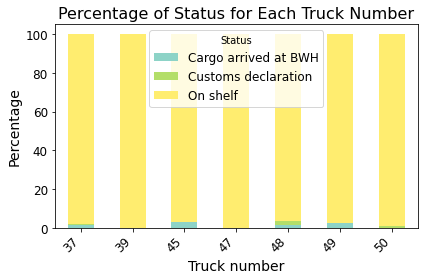

In [110]:
merged['Truck number'] = pd.to_numeric(merged['Truck number'])

pivot_df = merged.pivot(index='Truck number', columns='Status', values='Percentage').fillna(0)

plt.figure(figsize=(100, 100))
pivot_df.plot(kind='bar', stacked=True, cmap='Set3')  
plt.xlabel('Truck number', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of Status for Each Truck Number', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Status', fontsize=12)
plt.tight_layout()
plt.show()

In [111]:
fig = go.Figure()

for status in pivot_df.columns:
    fig.add_trace(go.Bar(
        x=pivot_df.index,
        y=pivot_df[status],
        name=status
    ))

fig.update_layout(
    barmode='stack',
    title='Percentage of Status for Each Truck Number',
    xaxis=dict(title='Truck number', tickangle=-45),
    yaxis=dict(title='Percentage'),
    legend=dict(title='Status'),
    font=dict(size=12),
    width=1000,  # Increased width
    height=1000,  # Increased height
)

fig.show()

- По графику выше (обычному или интерактивному) визуально можно оценить актуальное состояние траков